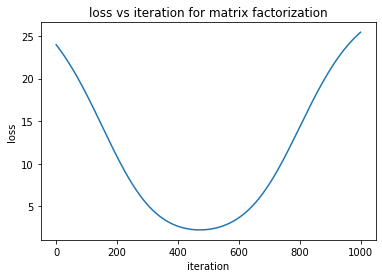

In [2]:
from typing import Tuple
import torch
import matplotlib.pyplot as plt

rank = 2
A = torch.Tensor([0.3374, 0.6005, 0.1735, 3.3359, 0.0492, 1.8374, 2.9704, 0.5301, 2.2620])
A = torch.reshape(A, (3, 3))
losses = []
def sgd_factorise(A, rank, losses, num_epochs = 1000, lr = 0.001):
    U = torch.empty(A.size()[0], rank).random_(2)
    V = torch.empty(A.size()[1], rank).random_(2)
    for epoch in range(num_epochs):
        for i in range(A.size()[0]):
            for j in range(A.size()[1]):
                e = A[i][j] - U[i]*V[j].t()
                U[i] = U[i] + lr*e*V[j]
                V[j] = V[j] + lr*e*U[i]
        loss = torch.nn.functional.mse_loss(A, torch.matmul(U,V.t()), reduction = "sum")
        losses.append(loss)
    return U, V, losses

U, V, losses = sgd_factorise(A, rank, losses, num_epochs = 1000, lr = 0.001)
plt.plot(range(1000), losses)
plt.title("loss vs iteration for matrix factorization")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()



In [25]:
U, S, V = torch.svd(A)
S[2] = 0
new = torch.mm(torch.mm(U, torch.diag(S)), V.t())
B = torch.rand(3, 3)
error1 = torch.dist(A, torch.mm(torch.mm(U, torch.diag(S)), V.t()))
error2 = torch.dist(A, B)
print("according to Eckart-Young theorem ||A - A_k|| = {0} is always less or equal ||A - B|| = {1}".format(float(error1), float(error2)))


according to Eckart-Young theorem ||A - A_k|| = 0.3408477008342743 is always less or equal ||A - B|| = 4.037203788757324


A tensor([[0.3374, 0.6005, 0.1735],
        [3.3359, 0.0492, 1.8374],
        [2.9704, 0.5301, 2.2620]])
reconstructed A tensor([[0.6319, 0.0327, 0.4803],
        [4.8220, 0.2499, 3.6647],
        [5.9452, 0.3081, 4.5184]])


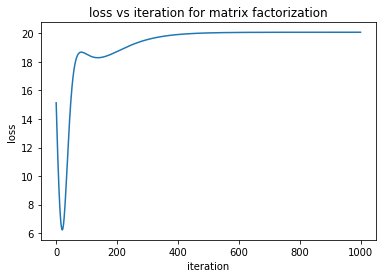

In [58]:
from typing import Tuple
import torch
import matplotlib.pyplot as plt

rank = 2
A = torch.Tensor([0.3374, 0.6005, 0.1735, 3.3359, 0.0492, 1.8374, 2.9704, 0.5301, 2.2620])
A = torch.reshape(A, (3, 3))
# M = torch.empty(A.size()[0], A.size()[1]).random_(2)
M = torch.Tensor([1, 1, 1, 0, 1, 1, 1, 0, 1])
M = torch.reshape(M, (3, 3))
losses = []
def sgd_factorise_masked(A, M, rank, losses, num_epochs = 1000, lr = 0.01):
    U = torch.rand(A.size()[0], rank)
    V = torch.rand(A.size()[1], rank)
    for epoch in range(num_epochs):
        for i in range(A.size()[0]):
            for j in range(A.size()[1]):
                if M[i][j] != 0:
                    e = A[i][j] - U[i]*V[j].t()
                    U[i] = U[i] + lr*e*V[j]
                    V[j] = V[j] + lr*e*U[i]
        loss = torch.nn.functional.mse_loss(A, torch.matmul(U,V.t()), reduction = "sum")
        losses.append(loss)
    return U, V, losses

U, V, losses = sgd_factorise_masked(A, M, rank, losses, num_epochs = 1000, lr = 0.01)
print("A", A)
reconstructed = torch.matmul(U,V.t())
print("reconstructed A", reconstructed)
plt.plot(range(1000), losses)
plt.title("loss vs iteration for matrix factorization")
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()
